In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
from datetime import datetime
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
%matplotlib inline

In [180]:
en_con = pd.read_csv ('Energy_consumption_by_source.csv')
en_pro = pd.read_csv ('Energy_production_by_source.csv')
elect = pd.read_csv ('Electricity_net_generation.csv')

In [181]:
##adding a month column
en_con['date_month'] = en_con['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char
en_pro['date_month'] = en_pro['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char
elect['date_month'] = elect['YYYYMM'].astype("str").apply(lambda x: x[-2:]) ##get last 4 char

In [182]:
# Removing rows where Month = 13
en_con=en_con.drop(en_con[en_con['date_month'] == "13"].index)
en_pro=en_pro.drop(en_pro[en_pro['date_month'] == "13"].index)
elect=elect.drop(elect[elect['date_month'] == "13"].index)

In [183]:
##subsetting data for 2005 to 2020
start_date = 200501
end_date = 202012

en_con = en_con[(en_con['YYYYMM'] >= start_date) & (en_con['YYYYMM'] <= end_date)].reset_index()
en_pro = en_pro[(en_pro['YYYYMM'] >= start_date) & (en_pro['YYYYMM'] <= end_date)].reset_index()
elect = elect[(elect['YYYYMM'] >= start_date) & (elect['YYYYMM'] <= end_date)].reset_index()

## Comparison of United States Total Energy Production and Consumption

In [184]:
##pre-processing en_pro
en_pro['Value'] = en_pro['Value'].astype("float")
en_pro['date_year'] = en_pro['YYYYMM'].astype("str").apply(lambda x: x[:4])
en_pro_srcdate = en_pro.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})

print(en_pro_srcdate['Description'].unique()) ##finding unique description

['Biomass Energy Production' 'Coal Production' 'Crude Oil Production'
 'Geothermal Energy Production' 'Hydroelectric Power Production'
 'Natural Gas (Dry) Production' 'Natural Gas Plant Liquids Production'
 'Nuclear Electric Power Production' 'Solar Energy Production'
 'Total Fossil Fuels Production' 'Total Primary Energy Production'
 'Total Renewable Energy Production' 'Wind Energy Production']


In [185]:
total_pro = ['Total Fossil Fuels Production',
             'Nuclear Electric Power Production',
             'Total Renewable Energy Production']
total_en_pro_srcdate = en_pro_srcdate[en_pro_srcdate['Description'].isin(total_pro)] ##filtering by renewables
print(total_en_pro_srcdate['Description'].unique())

['Nuclear Electric Power Production' 'Total Fossil Fuels Production'
 'Total Renewable Energy Production']


In [186]:
##pre-processing en_con
en_con['Value'] = en_con['Value'].astype("float") ##change value type as float
en_con['date_year'] = en_con['YYYYMM'].astype("str").apply(lambda x: x[:4]) ##get first 4 char
en_con_srcdate = en_con.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})
print(en_con_srcdate['Description'].unique()) ##finding unique descriptions

['Biomass Energy Consumption' 'Coal Consumption'
 'Geothermal Energy Consumption' 'Hydroelectric Power Consumption'
 'Natural Gas Consumption (Excluding Supplemental Gaseous Fuels)'
 'Nuclear Electric Power Consumption'
 'Petroleum Consumption (Excluding Biofuels)' 'Solar Energy Consumption'
 'Total Fossil Fuels Consumption' 'Total Primary Energy Consumption'
 'Total Renewable Energy Consumption' 'Wind Energy Consumption']


In [187]:
total_con = ['Total Fossil Fuels Consumption',
             'Nuclear Electric Power Consumption',
             'Total Renewable Energy Consumption']
total_en_con_srcdate = en_con_srcdate[en_con_srcdate['Description'].isin(total_con)] ##filtering by renewables
print(total_en_con_srcdate['Description'].unique())

['Nuclear Electric Power Consumption' 'Total Fossil Fuels Consumption'
 'Total Renewable Energy Consumption']


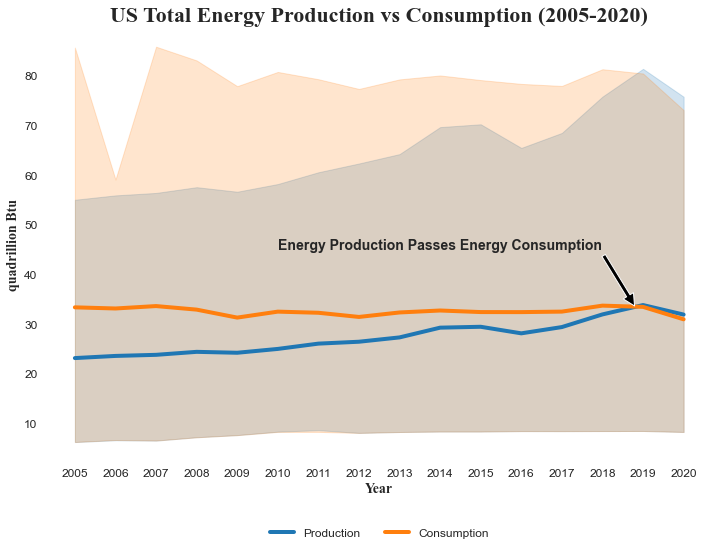

In [188]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

sns.lineplot(data = total_en_pro_srcdate,
    x='date_year', y='Value', linewidth = 4, label='Production') # first dataset
sns.lineplot(data = total_en_con_srcdate,
    x='date_year', y='Value', linewidth = 4,  label='Consumption') # second dataset

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

ax.annotate('Energy Production Passes Energy Consumption', xy=(13.8, 33.5), xytext=(5, 45),
            arrowprops=dict(facecolor='black', shrink=0.01, width=4), size=14, weight='bold')

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Total Energy Production vs Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)

plt.show()

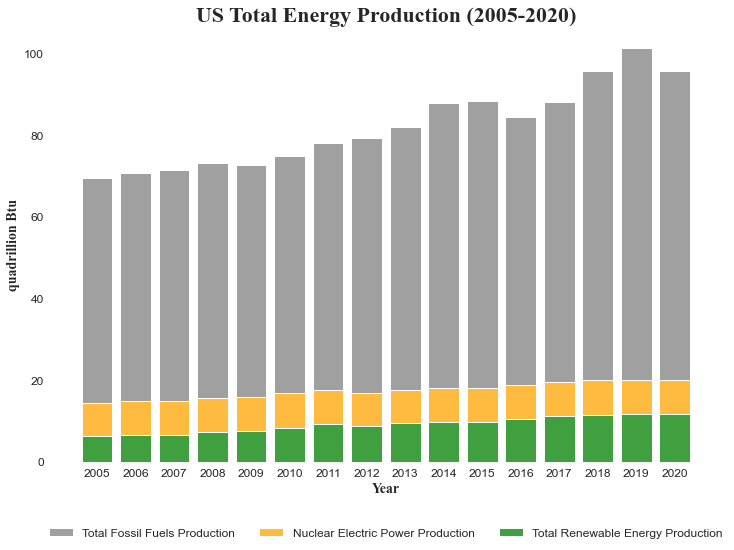

In [189]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

hue_order = ['Total Fossil Fuels Production',
             'Nuclear Electric Power Production',
             'Total Renewable Energy Production']

c = ["gray", "orange", "green"]

ax = sns.histplot(
    data = total_en_pro_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    hue_order = hue_order,
    palette = c)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Total Energy Production (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

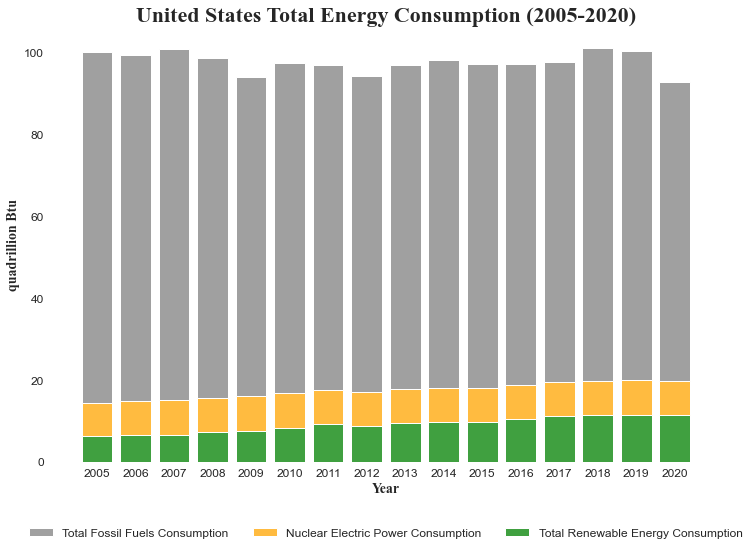

In [190]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

hue_order = ['Total Fossil Fuels Consumption',
             'Nuclear Electric Power Consumption',
             'Total Renewable Energy Consumption']

c = ["gray", "orange", "green"]

ax = sns.histplot(
    data = total_en_con_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    hue_order = hue_order,
    palette = c)

sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.2),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("United States Total Energy Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## United States Total Energy Production and Consumption and by Renewable Energy Sources

In [191]:
renewables_pro = ['Hydroelectric Power Production', 'Geothermal Energy Production', 
             'Solar Energy Production', 'Wind Energy Production', 'Biomass Energy Production']

In [192]:
ren_pro_srcdate = en_pro_srcdate[en_pro_srcdate['Description'].isin(renewables_pro)] ##filtering by renewables
print(ren_pro_srcdate['Description'].unique())

['Biomass Energy Production' 'Geothermal Energy Production'
 'Hydroelectric Power Production' 'Solar Energy Production'
 'Wind Energy Production']


In [193]:
ren_pro_srcdate.head()

,Description,date_year,Value
0,Biomass Energy Production,2005,3.101186
1,Biomass Energy Production,2006,3.211514
2,Biomass Energy Production,2007,3.472078
3,Biomass Energy Production,2008,3.868251
4,Biomass Energy Production,2009,3.956618


In [194]:
renewables_con = ['Hydroelectric Power Consumption', 'Geothermal Energy Consumption', 
             'Solar Energy Consumption', 'Wind Energy Consumption', 'Biomass Energy Consumption']

In [195]:
ren_con_srcdate = en_con_srcdate[en_con_srcdate['Description'].isin(renewables_con)] ##filtering by renewables
print(ren_con_srcdate['Description'].unique())

['Biomass Energy Consumption' 'Geothermal Energy Consumption'
 'Hydroelectric Power Consumption' 'Solar Energy Consumption'
 'Wind Energy Consumption']


In [196]:
ren_con_srcdate.head()

,Description,date_year,Value
0,Biomass Energy Consumption,2005,3.113930
1,Biomass Energy Consumption,2006,3.262140
2,Biomass Energy Consumption,2007,3.484825
3,Biomass Energy Consumption,2008,3.851392
4,Biomass Energy Consumption,2009,3.940016


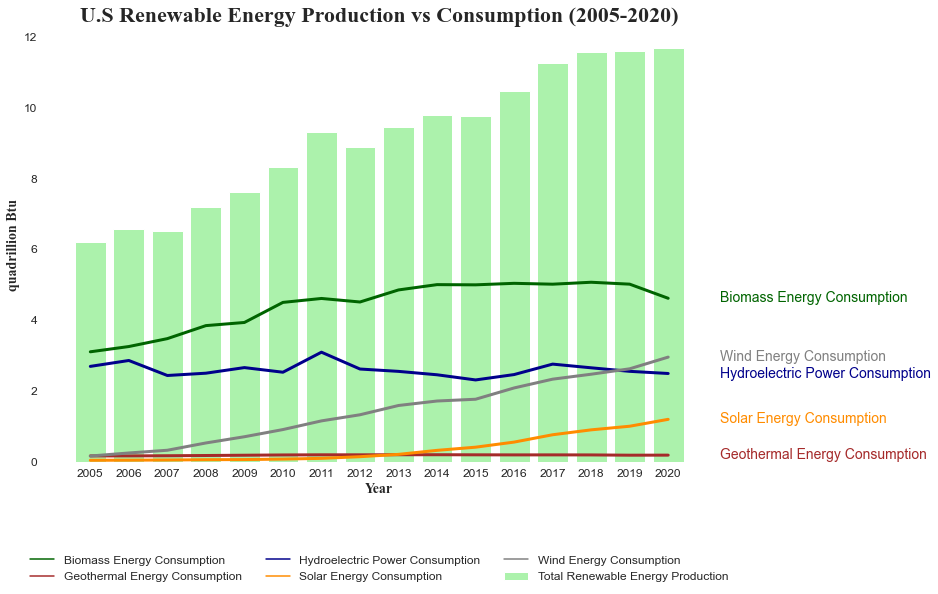

In [197]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

c = ["darkgreen", "brown", "darkblue", "darkorange", "gray"]

sns.histplot(
    data = ren_pro_srcdate,
    x='date_year',
    weights='Value',
    shrink=0.8,
    label='Total Renewable Energy Production',
    color='lightgreen')

sns.lineplot(data = ren_con_srcdate,
    x='date_year', y='Value', linewidth = 3, ci=None, hue='Description', palette=c) # second dataset
    
sns.move_legend(
    ax, "lower center",
    bbox_to_anchor=(0.5, -.3),
    ncol=3,
    title=None, 
    frameon=False,
    fontsize = 12
)

for line, name in zip(ax.lines, sorted(set(ren_con_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")


plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("U.S Renewable Energy Production vs Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

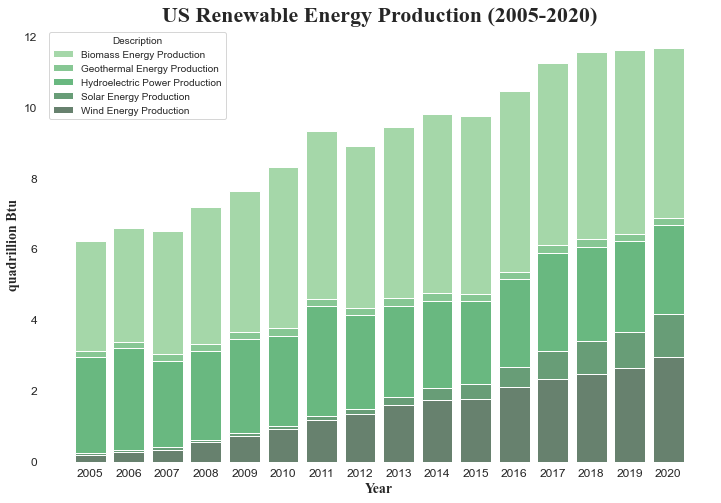

In [198]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

pal = sns.color_palette("Greens_d", 5)

ax = sns.histplot(
    data = ren_pro_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    palette = pal)

for line, name in zip(ax.lines, sorted(set(ren_pro_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Renewable Energy Production (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

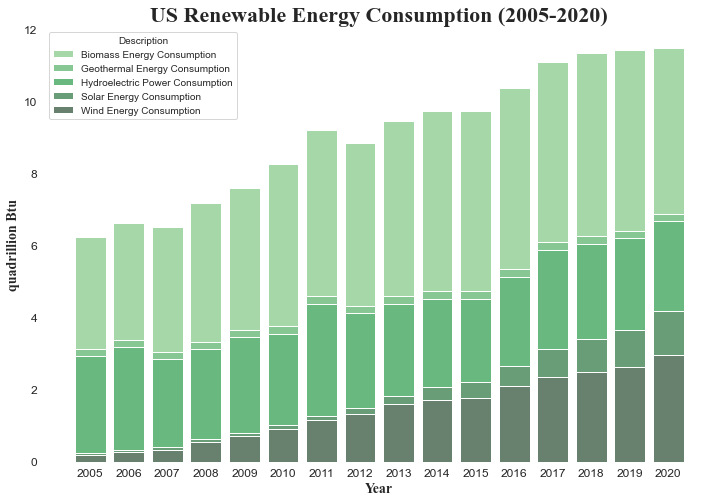

In [199]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

pal = sns.color_palette("Greens_d", 5)

ax = sns.histplot(
    data = ren_con_srcdate,
    x='date_year',
    weights='Value',
    hue='Description',
    multiple='stack',
    edgecolor='white',
    shrink=0.8,
    palette = pal)

for line, name in zip(ax.lines, sorted(set(ren_con_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Renewable Energy Consumption (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()

## United States Electricity Generation By Energy Sources

In [200]:
elect.head()

,index,MSN,YYYYMM,Value,Column_Order,Description,Unit,date_month
0,440,CLETPUS,200501,177013.907,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,01
1,441,CLETPUS,200502,155818.014,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,02
2,442,CLETPUS,200503,163612.7,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,03
3,443,CLETPUS,200504,143083.239,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,04
4,444,CLETPUS,200505,153957.962,1,"Electricity Net Generation From Coal, All Sectors",Million Kilowatthours,05


In [201]:
##pre-processing elect
elect['Value'] = elect['Value'].astype("float") ##change value type as float
elect['date_year'] = elect['YYYYMM'].astype("str").apply(lambda x: x[:4]) ##get first 4 char
elect_srcdate = elect.groupby(['Description','date_year'], as_index = False).agg({"Value":"sum"})

In [202]:
renewables_elect = ['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
                  'Electricity Net Generation From Geothermal, All Sectors',
                  'Electricity Net Generation From Solar, All Sectors',
                  'Electricity Net Generation From Waste, All Sectors',
                  'Electricity Net Generation From Wind, All Sectors',
                  'Electricity Net Generation From Wood, All Sectors']

In [203]:
ren_filtered = elect_srcdate[elect_srcdate['Description'].isin(renewables_elect)]

In [204]:
elect_srcdate = ren_filtered.groupby('date_year')['Value'].sum().reset_index()\
.assign(Description='Total Renewable Net Generation').append(elect_srcdate, ignore_index=True)
##assigning renewable energy total to elect_srcdate

In [205]:
print(elect_srcdate['Description'].unique()) ##finding unique descriptions

['Total Renewable Net Generation'
 'Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Geothermal, All Sectors'
 'Electricity Net Generation From Hydroelectric Pumped Storage, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Other Gases, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors'
 'Electricity Net Generation Total (including from sources not shown), All Sectors']


In [206]:
total_elect = ['Total Renewable Net Generation',
               'Electricity Net Generation From Coal, All Sectors',
               'Electricity Net Generation From Petroleum, All Sectors',
               'Electricity Net Generation From Natural Gas, All Sectors',
               'Electricity Net Generation From Nuclear Electric Power, All Sectors']

In [207]:
total_srcdate = elect_srcdate[elect_srcdate['Description'].isin(total_elect)] ##filtering by renewables
print(total_srcdate['Description'].unique())

['Total Renewable Net Generation'
 'Electricity Net Generation From Coal, All Sectors'
 'Electricity Net Generation From Natural Gas, All Sectors'
 'Electricity Net Generation From Nuclear Electric Power, All Sectors'
 'Electricity Net Generation From Petroleum, All Sectors']


In [208]:
total_srcdate.head()

,date_year,Value,Description
0,2005,357650.654,Total Renewable Net Generation
1,2006,385771.904,Total Renewable Net Generation
2,2007,352747.487,Total Renewable Net Generation
3,2008,380932.389,Total Renewable Net Generation
4,2009,417723.800,Total Renewable Net Generation


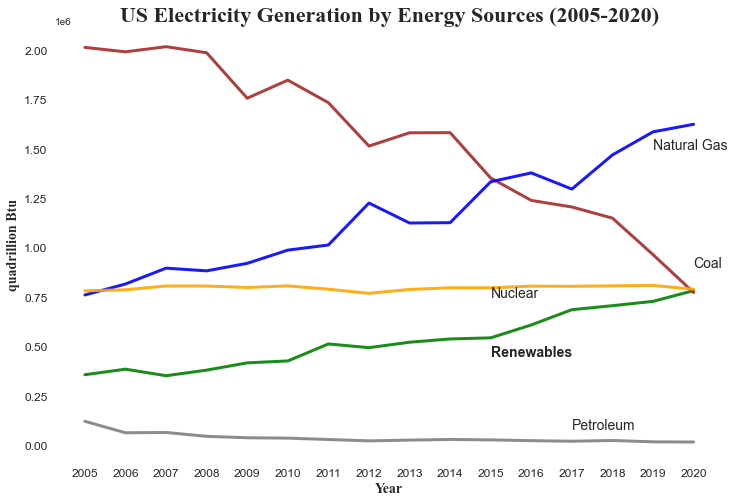

In [209]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

c = ["green", "brown", "blue", "orange", "gray"]

sns.lineplot(data = total_srcdate,
             x = total_srcdate['date_year'], 
             y = total_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             palette = c,
             hue = total_srcdate["Description"],
             ax = ax,
             linewidth=3,
             legend=False)

ax.annotate(text='Petroleum', xy=(12, 80000), xycoords='data', size=14)
ax.annotate(text='Renewables', xy=(10, 450000), xycoords='data', size=14, weight='bold')
ax.annotate(text='Nuclear', xy=(10, 750000), xycoords='data', size=14)
ax.annotate(text='Coal', xy=(15, 900000), xycoords='data', size=14)
ax.annotate(text='Natural Gas', xy=(14, 1500000), xycoords='data', size=14)


plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("US Electricity Generation by Energy Sources (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')


sns.despine(left = True, right = True, top = True, bottom = True)
##plt.legend(loc = 0, ncol = 2, fontsize = 6, labels = None)
plt.show()

In [210]:
renewables_elect = renewables_elect = ['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors',
                  'Electricity Net Generation From Solar, All Sectors',
                  'Electricity Net Generation From Waste, All Sectors',
                  'Electricity Net Generation From Wind, All Sectors',
                  'Electricity Net Generation From Wood, All Sectors']
relect_srcdate = elect_srcdate[elect_srcdate['Description'].isin(renewables_elect)] ##filtering by renewables
print(relect_srcdate['Description'].unique())

['Electricity Net Generation From Conventional Hydroelectric Power, All Sectors'
 'Electricity Net Generation From Solar, All Sectors'
 'Electricity Net Generation From Waste, All Sectors'
 'Electricity Net Generation From Wind, All Sectors'
 'Electricity Net Generation From Wood, All Sectors']


In [211]:
relect_srcdate.head()

,date_year,Value,Description
32,2005,270321.257,Electricity Net Generation From Conventional H...
33,2006,289246.416,Electricity Net Generation From Conventional H...
34,2007,247509.975,Electricity Net Generation From Conventional H...
35,2008,254831.383,Electricity Net Generation From Conventional H...
36,2009,273445.095,Electricity Net Generation From Conventional H...


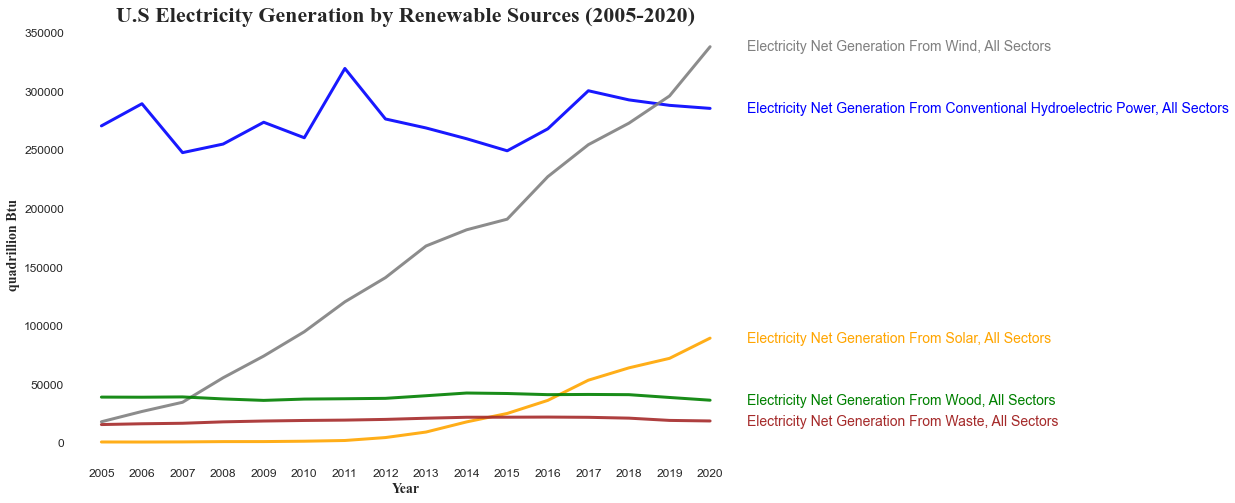

In [212]:
fig, ax = plt.subplots(figsize=(12,8))   
sns.set_style("white", {'axes.grid' : False})
sns.set_context(rc = {"grid.linewidth": 0.6})

c = ["blue", "orange", "brown", "gray", "green"]

sns.lineplot(data = relect_srcdate,
             x = relect_srcdate['date_year'], 
             y = relect_srcdate['Value'],
             color = 'blue',
             ci = None,
             alpha = 0.9,
             hue = relect_srcdate['Description'],
             palette = c,
             ax = ax,
            legend=False,
            linewidth=3)

for line, name in zip(ax.lines, sorted(set(relect_srcdate['Description']))):
    y = line.get_ydata()[-1]
    ax.annotate(name, xy=(1,y), xytext=(6,0), color=line.get_color(), 
                xycoords = ax.get_yaxis_transform(), textcoords="offset points",
                size=14, va="center")

plt.yticks(size = 12)
plt.xticks(size = 12)
plt.xlabel('Year', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.ylabel('quadrillion Btu', fontfamily = "Times New Roman", size = 14, weight='bold')
plt.title("U.S Electricity Generation by Renewable Sources (2005-2020)", fontfamily = "Times New Roman", 
        size = 22, weight='bold')

sns.despine(left = True, right = True, top = True, bottom = True)
plt.show()